# What turnout tells us?
> Exploratory data anaylsis with vote and demographic data

- toc: true 
- badges: false
- comments: true
- categories: [jupyter]
- image: images/margin_turnout.png

# 

In [13]:
# hide
library("tidyverse")
library("gridExtra")

margin_pr = readr::read_csv("margin_pr_turnout.csv", col_types = cols(year = col_factor()))
margin_records = readr::read_csv("margin_records.csv")
edu_pr = readr::read_csv("edu_pr_turnout.csv", col_types = cols(year = col_factor()))
edu_records = readr::read_csv("edu_records.csv")

color_gradient <- c("#f981df", "#f867d4", "#f747c8", "#f606ba", 
                    "#c41a9a", "#961d7a", "#6b1b5a", "#43153b")

Parsed with column specification:
cols(
  villID = col_character(),
  mayoral = col_double(),
  presidential = col_double(),
  margin_pr = col_double()
)

Parsed with column specification:
cols(
  villID = col_character(),
  mayoral = col_double(),
  presidential = col_double(),
  univ_pr = col_double()
)



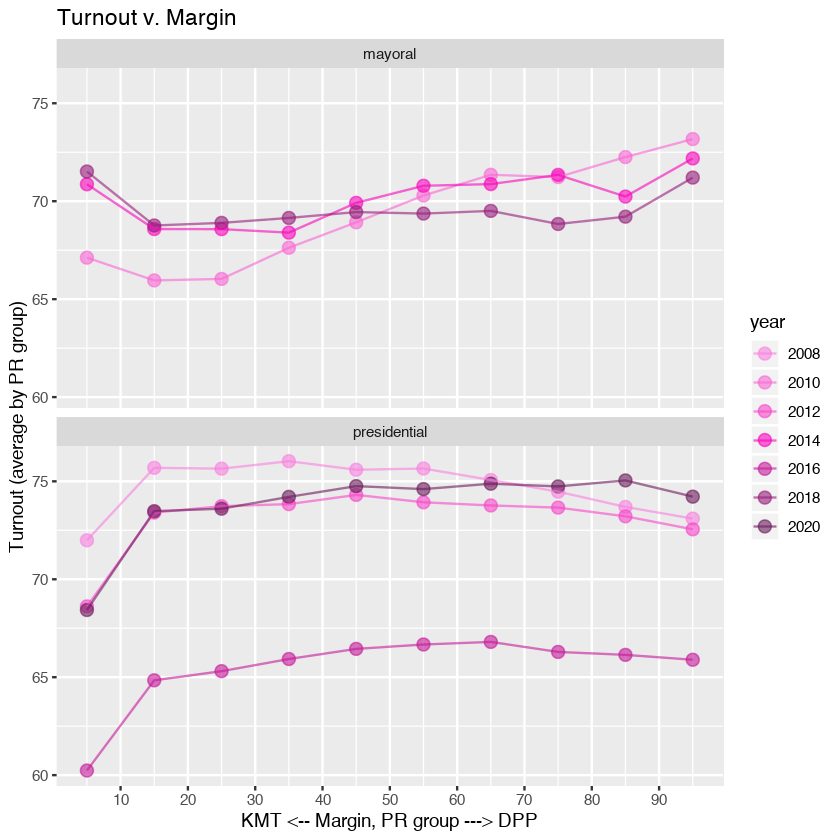

In [6]:
# collapse-hide
ggplot(margin_pr, aes(x = margin_pr_interval_by_year, y = avg_turnout, color = year)) +
  geom_point(size = 3, alpha = 0.6) +
  geom_line(aes(group = year), alpha = 0.6) +
  scale_color_manual(values = color_gradient) +
  scale_x_continuous(breaks = seq(0, 100, 10)) +
  labs(title = "Turnout v. Margin",
       x = "KMT <-- Margin, PR group ---> DPP",
       y = "Turnout (average by PR group)") +
  facet_wrap(~election, nrow = 2)

Warning message:
“Removed 12 rows containing missing values (geom_point).”
Warning message:
“Removed 20 rows containing missing values (geom_point).”


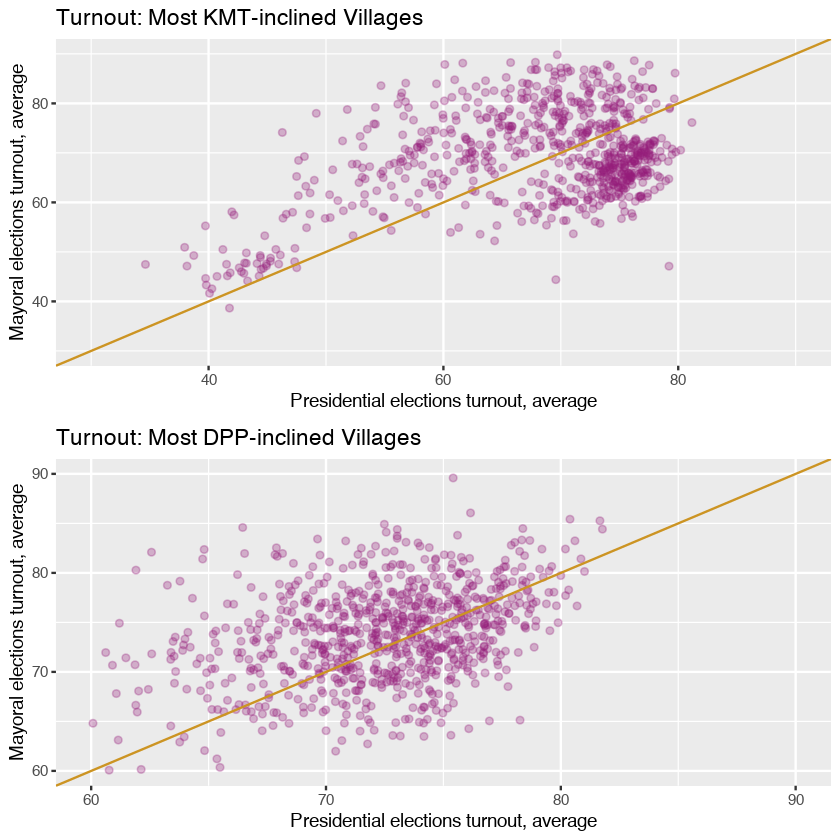

In [18]:
# collapse-hide
mayoral_presidential_turnout_KMT <- margin_records %>%
  filter(margin_pr < 10) %>% 
  drop_na() %>%
  ggplot() +
  geom_point(aes(x = presidential, y = mayoral), alpha = 0.3, color = "#961d7a") +
  geom_abline(intercept = 0, slope = 1, color = "#CC9423") +
  xlim(c(30, 90)) +
  ylim(c(30, 90)) +
  labs(title = "Turnout: Most KMT-inclined Villages",
       x = "Presidential elections turnout, average",
       y = "Mayoral elections turnout, average")

mayoral_presidential_turnout_DPP <- margin_records %>%
  filter(margin_pr >= 90) %>% 
  drop_na() %>%
  ggplot() +
  geom_point(aes(x = presidential, y = mayoral), alpha = 0.3, color = "#961d7a") +
  geom_abline(intercept = 0, slope = 1, color = "#CC9423") +
  xlim(c(60, 90)) +
  ylim(c(60, 90)) +
  labs(title = "Turnout: Most DPP-inclined Villages",
       x = "Presidential elections turnout, average",
       y = "Mayoral elections turnout, average")

grid.arrange(mayoral_presidential_turnout_KMT, 
             mayoral_presidential_turnout_DPP, nrow=2)

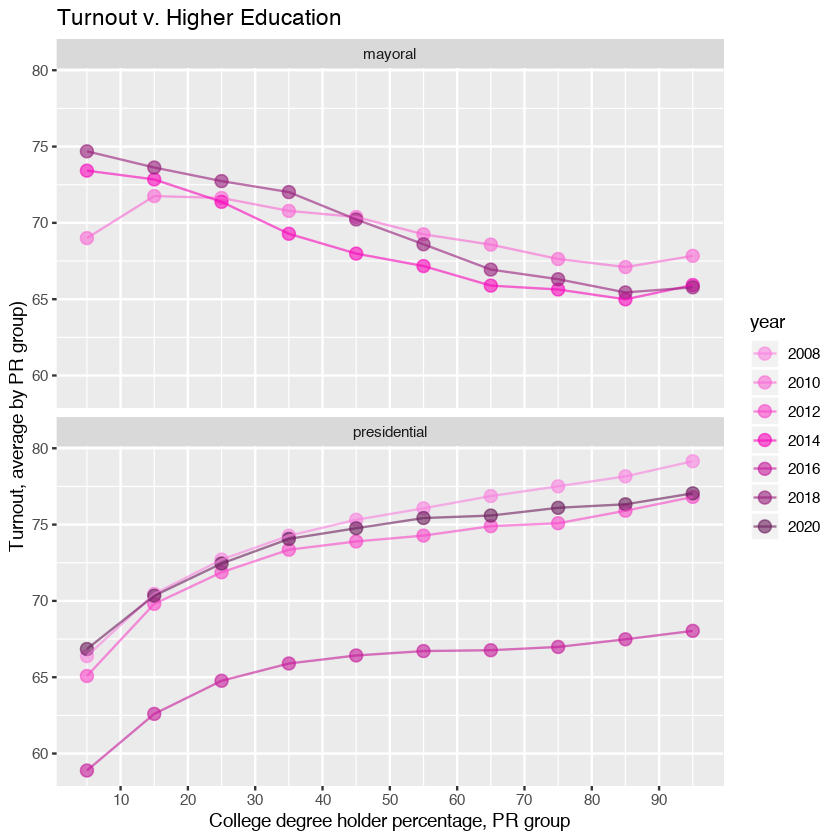

In [9]:
# collapse-hide
ggplot(edu_pr, aes(x = univ_pr_interval_by_year, y = avg_turnout, color = year)) +
  geom_point(size = 3, alpha = 0.6) +
  geom_line(aes(group = year), alpha = 0.6) +
  scale_color_manual(values = color_gradient) +
  scale_x_continuous(breaks = seq(0, 100, 10)) +
  labs(title = "Turnout v. Higher Education",
       x = "College degree holder percentage, PR group",
       y = "Turnout, average by PR group)") +
  facet_wrap(~election, nrow = 2)

Warning message:
“Removed 7 rows containing missing values (geom_point).”
Warning message:
“Removed 77 rows containing missing values (geom_point).”


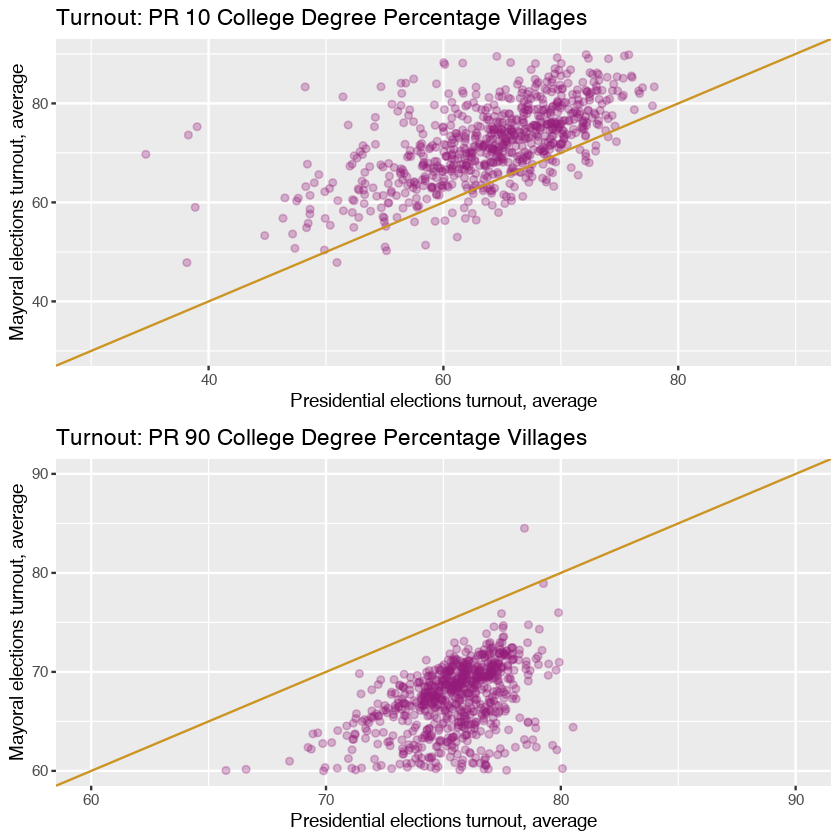

In [17]:
# collapse-hide
mayoral_presidential_turnout_low_edu <- edu_records %>%
  filter(univ_pr < 10) %>% 
  drop_na() %>%
  ggplot() +
  geom_point(aes(x = presidential, y = mayoral), alpha = 0.3, color = "#961d7a") +
  geom_abline(intercept = 0, slope = 1, color = "#CC9423") +
  xlim(c(30, 90)) +
  ylim(c(30, 90)) +
  labs(title = "Turnout: PR 10 College Degree Percentage Villages",
       x = "Presidential elections turnout, average",
       y = "Mayoral elections turnout, average")

mayoral_presidential_turnout_high_edu <- edu_records %>%
  filter(univ_pr >= 90) %>% 
  drop_na() %>%
  ggplot() +
  geom_point(aes(x = presidential, y = mayoral), alpha = 0.3, color = "#961d7a") +
  geom_abline(intercept = 0, slope = 1, color = "#CC9423") +
  xlim(c(60, 90)) +
  ylim(c(60, 90)) +
  labs(title = "Turnout: PR 90 College Degree Percentage Villages",
       x = "Presidential elections turnout, average",
       y = "Mayoral elections turnout, average")

grid.arrange(mayoral_presidential_turnout_low_edu, 
             mayoral_presidential_turnout_high_edu, nrow=2)